# Sum of Square Error function, Visualizaiton

In [2]:
%matplotlib inline

In [1]:
import torch
import torch.nn as nn
import numpy as np

In [8]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = 10, 6
import matplotlib.pyplot as plt 

In [75]:
N = 10
x = 2 * (np.random.rand(N) - 0.5)
x

array([-0.51162111,  0.73778794,  0.83195119, -0.41009479,  0.78076254,
        0.70091894,  0.60075252, -0.18745928, -0.80253122, -0.5790785 ])

In [78]:
w0true = 1
w1true = 2
ytrue = w0true + w1true * x

std = 0.1
y = ytrue + np.random.randn(N)*std

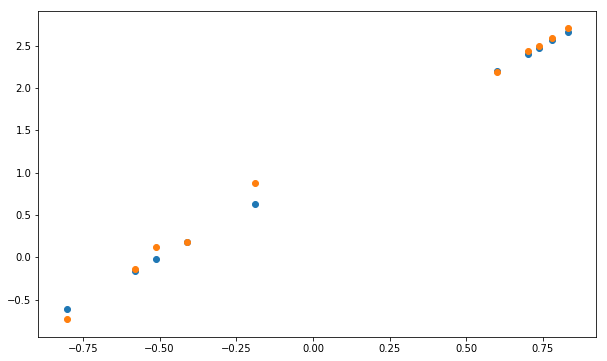

In [79]:
plt.scatter (x, ytrue)
plt.scatter (x, y)

In [85]:
def E(w0, w1):
    yhat = w0 + w1 * x
    e2 = np.sum( np.square(y - yhat) )
    return e2

In [86]:
e2 = E(1,2.01)
e2

0.10720160621435418

In [150]:
ngrid_w0 = 140
grid_w0 = np.linspace(-2,4,ngrid_w0)
ngrid_w1 = 200
grid_w1 = np.linspace(-5,10,ngrid_w1)
G = np.empty((ngrid_w0,ngrid_w1))
grid_w0.shape, grid_w1.shape

((140,), (200,))

In [151]:
for i, w0 in enumerate(grid_w0):
    for j, w1 in enumerate(grid_w1):
        G[i,j] = E(w0, w1)

In [152]:
G.max(), G.min()

(407.8984652010925, 0.0950272417840689)

In [153]:
I = (G - G.min()) / (G.max() - G.min())
I.max(), I.min()

(1.0, 0.0)

Text(0.5, 0, 'w1')

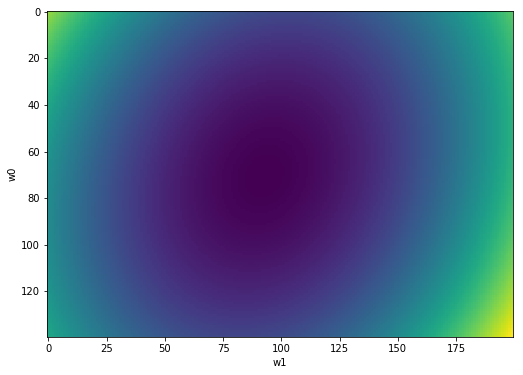

In [157]:
plt.imshow (I)#, cmap='gray')
plt.xlabel ('w1')
plt.ylabel ('w0')

In [136]:
W0, W1 = np.meshgrid(grid_w0, grid_w1, indexing='ij')

In [137]:
W0.shape, W1.shape

((140, 200), (140, 200))

In [138]:
ef = np.empty( (ngrid_w0, ngrid_w1) )
for i in range (ngrid_w0):
    for j in range (ngrid_w1):
        ef[i,j] = np.sum(np.square( y - (W0[i,j] + W1[i,j]*x)))

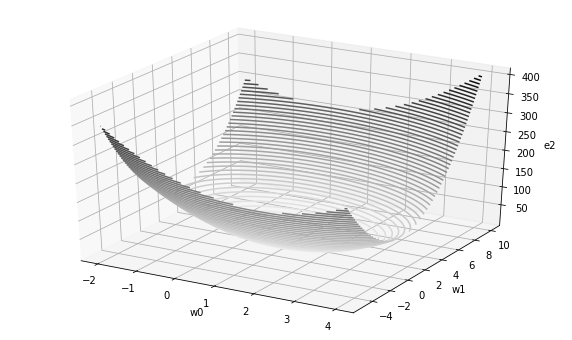

In [139]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(W0, W1, ef, 50, cmap='binary', rstride=1, cstride=1)
ax.set_xlabel('w0')
ax.set_ylabel('w1')
ax.set_zlabel('e2');

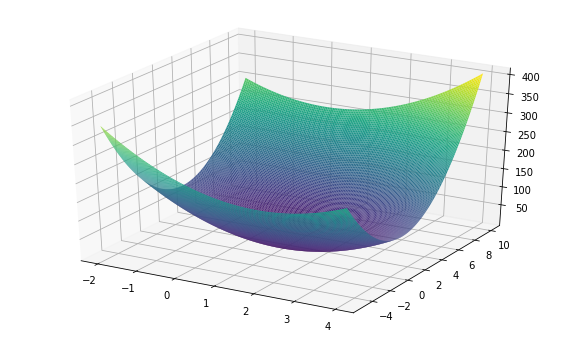

In [140]:
ax = plt.axes(projection='3d')
ax.plot_surface(W0, W1, ef, rstride=1, cstride=1, cmap='viridis', edgecolor='none')

Text(0, 0.5, 'W1')

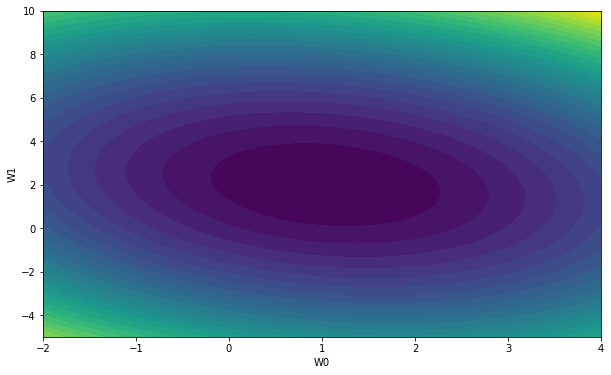

In [159]:
plt.contourf (W0, W1, ef, levels=30)
plt.xlabel ('W0')
plt.ylabel ('W1')

In [167]:
ij_min = np.unravel_index( np.argmin (ef, axis=None), ef.shape)
print (ij_min, ef[ij_min], ef.min())

(70, 93) 0.0950272417840689 0.0950272417840689


# END